In [144]:
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error
import matplotlib .pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

In [145]:
df=px.data.tips()
x = df.total_bill.values.reshape(-1,1)
model = LinearRegression()
model.fit(x,df.tip)
x_range = np.linspace(x.min(), x.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

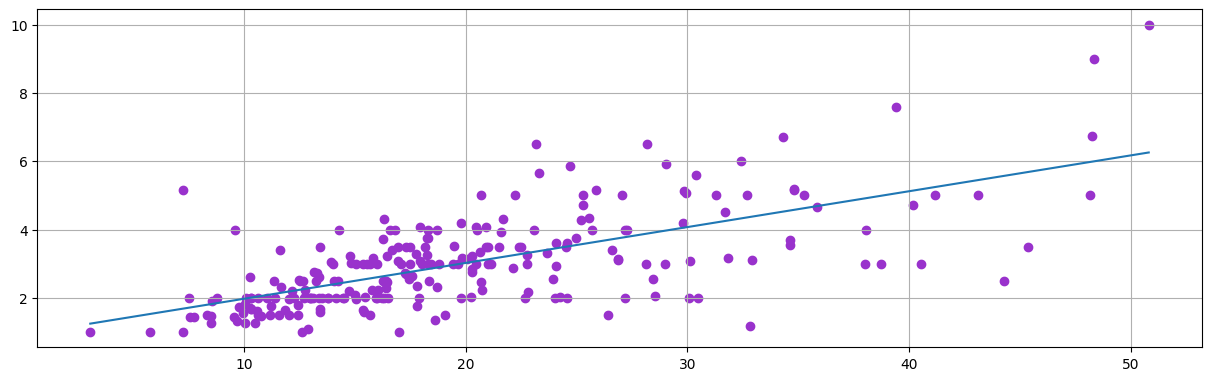

In [146]:
fig, ax = plt.subplots(figsize=(12, 3.7), layout='constrained')
ax.plot(x_range,y_range)
ax.scatter(df['total_bill'].values,df['tip'].values,c='darkorchid')
ax.grid(True)

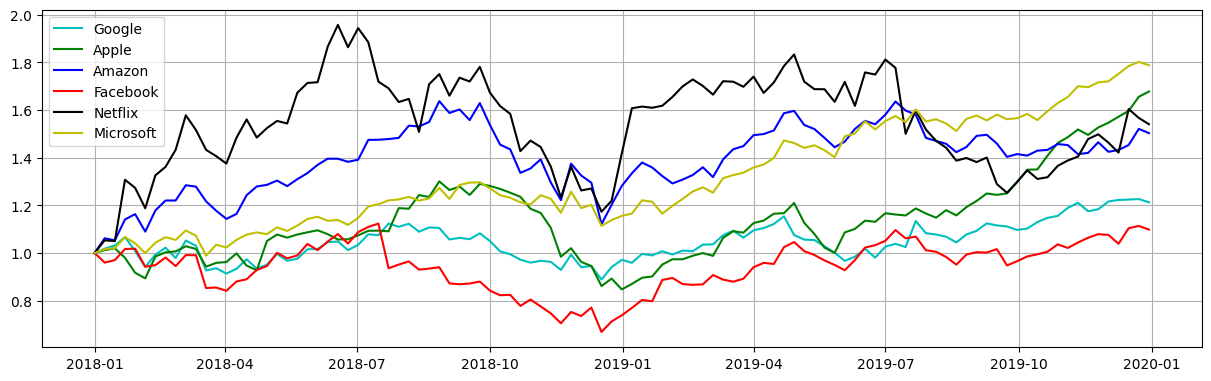

In [147]:
df2=px.data.stocks(datetimes=True)

fig, ax = plt.subplots(figsize=(12, 3.7), layout='constrained')
ax.plot(df2['date'].values,df2['GOOG'].values, c='c', label='Google')
ax.plot(df2['date'].values,df2['AAPL'].values, c='g', label='Apple')
ax.plot(df2['date'].values,df2['AMZN'].values, c='b', label='Amazon')
ax.plot(df2['date'].values,df2['FB'].values, c='r', label='Facebook')
ax.plot(df2['date'].values,df2['NFLX'].values, c='k', label='Netflix')
ax.plot(df2['date'].values,df2['MSFT'].values, c='y', label='Microsoft')
ax.grid(True)
ax.legend()

https://www.kaggle.com/datasets/hrdkcodes/wine-data

PCD

In [149]:
dataset=pd.read_csv('../Database/wine.csv')
x=dataset.iloc[:,1:14].values
y=dataset.iloc[:,0].values
dataset.head(3)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.02, random_state=0)

In [151]:
from sklearn.preprocessing import StandardScaler
#Ajuste de escala
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [152]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
X_train=lda.fit_transform(X_train,y_train)
X_test=lda.transform(X_test)

In [153]:
# Comprobamos las variab les independientes resultantes con
# una regresion Logística para determinar que con solo dos
# variables obtenemos la predicción adecuada
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier . fit (X_train, y_train)

LogisticRegression(random_state=0)

In [154]:
# Prediccion del conjunto de prueba para
# comprar los resul tados
y_pred = classifier.predict(X_test)

In [155]:
# Creamos la matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [156]:
def formulacion(x_varible, y_varible):
    x_set, y_set = x_varible, y_varible
    x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,
                               stop = x_set[:,0].max()+1,step=0.01),np.arange(
                                    start = x_set[:,1].min()-1,
                                    stop = x_set[:,1].max()+1,step=0.01))

    plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                                      alpha=0.75,cmap=ListedColormap(('c','g','b')))

    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())

    for i,j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                    c=ListedColormap(('c','g','b'))(i),label=j)
        
    plt.title('Regresion Logistica (conjunto de entrenamiento)')
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.legend()
    plt.show()

C:\Users\leona\AppData\Local\Temp\ipykernel_11476\2524069285.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],


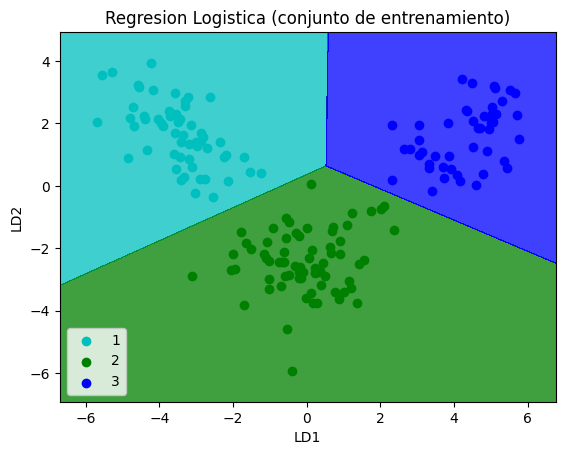

In [157]:
formulacion(X_train, y_train)

C:\Users\leona\AppData\Local\Temp\ipykernel_11476\2524069285.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],


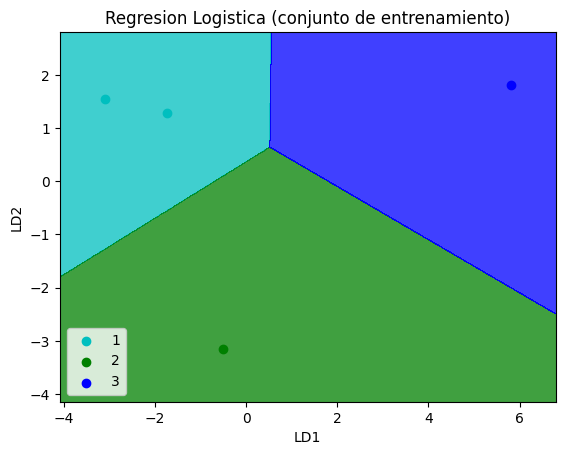

In [158]:
formulacion(X_test, y_test)

*Example de Max error*

In [159]:
y_verdadero=[1,2,3,4,5]
y_predicto=[1,2,3,4,-5]

max_error(y_verdadero,y_predicto)

10